# Anscombe Quartet

This is a tale of the summary statistics.  It's a story of four datasets that have nearly identical simple statistics and yet appear very different when inspected visually.

In [1]:
from __future__ import print_function
import numpy as np

In [2]:
x1 = np.asarray([10.0, 8.0,  13.0,  9.0,  11.0, 14.0, 6.0,  4.0,  12.0,  7.0,  5.0])
y1 = np.asarray([8.04, 6.95, 7.58,  8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])

x2 = np.asarray([10.0, 8.0,  13.0,  9.0,  11.0, 14.0, 6.0,  4.0,  12.0,  7.0,  5.0])
y2 = np.asarray([9.14, 8.14, 8.74,  8.77, 9.26, 8.10, 6.13, 3.10, 9.13,  7.26, 4.74])

x3 = np.asarray([10.0, 8.0,  13.0,  9.0,  11.0, 14.0, 6.0,  4.0,  12.0,  7.0,  5.0])
y3 = np.asarray([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15,  6.42, 5.73])

x4 = np.asarray([8.0,  8.0,  8.0,   8.0,  8.0,  8.0,  8.0,  19.0,  8.0,  8.0,  8.0])
y4 = np.asarray([6.58, 5.76, 7.71,  8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89])

## Mean and Variance of X's & Y's

The four X series and Y series have the same mean and variance up to 2 decimal places.

In [3]:
print ("x1   mean: ", np.mean(x1), "variance: ", np.var(x1))
print ("x2   mean: ", np.mean(x2), "variance: ", np.var(x2))
print ("x3   mean: ", np.mean(x3), "variance: ", np.var(x3))
print ("x4   mean: ", np.mean(x4), "variance: ", np.var(x4))

x1   mean:  9.0 variance:  10.0
x2   mean:  9.0 variance:  10.0
x3   mean:  9.0 variance:  10.0
x4   mean:  9.0 variance:  10.0


In [4]:
print ("y1   mean: ", round(np.mean(y1), 3), "variance: ", round(np.var(y1), 3))
print ("y2   mean: ", round(np.mean(y2), 3), "variance: ", round(np.var(y2), 3))
print ("y3   mean: ", format(round(np.mean(y3), 3), '.3f'), "variance: ", round(np.var(y3), 3))
print ("y4   mean: ", round(np.mean(y4), 3), "variance: ", round(np.var(y4), 3))

y1   mean:  7.501 variance:  3.752
y2   mean:  7.501 variance:  3.752
y3   mean:  7.500 variance:  3.748
y4   mean:  7.501 variance:  3.748


## Correlation between X's & Y's

For all four datasets, the correlation coefficients between X's & Y's are the same up to 2 decimal places. 

In [5]:
print ("correlation coefficient between x1 & y1: ", round(np.corrcoef(x1, y1)[0,1], 3))
print ("correlation coefficient between x2 & y2: ", round(np.corrcoef(x2, y2)[0,1], 3))
print ("correlation coefficient between x3 & y3: ", round(np.corrcoef(x3, y3)[0,1], 3))
print ("correlation coefficient between x4 & y4: ", round(np.corrcoef(x4, y4)[0,1], 3))

correlation coefficient between x1 & y1:  0.816
correlation coefficient between x2 & y2:  0.816
correlation coefficient between x3 & y3:  0.816
correlation coefficient between x4 & y4:  0.817


## Simple Statistics & Regression Coefficients

Let's do a linear regression for each set of X's and Y's.

In [6]:
from sklearn.linear_model import LinearRegression

reg1 = LinearRegression()
reg1.fit(x1.reshape(-1,1), y1.reshape(-1, 1))

reg2 = LinearRegression()
reg2.fit(x2.reshape(-1, 1), y2.reshape(-1, 1))

reg3 = LinearRegression()
reg3.fit(x3.reshape(-1, 1), y3.reshape(-1, 1))

reg4 = LinearRegression()
reg4.fit(x4.reshape(-1, 1), y4.reshape(-1, 1))

print("Intercept & Slope for 4 datasets:\n")
print("y1 = b + m*x1,   b:", round(reg1.intercept_, 4), "  m:", round(reg1.coef_,4))
print("y2 = b + m*x2,   b:", round(reg2.intercept_, 4), "  m:", format(round(reg2.coef_,4), '.4f'))
print("y3 = b + m*x3,   b:", round(reg3.intercept_, 4), "  m:", round(reg3.coef_,4))
print("y4 = b + m*x3,   b:", round(reg4.intercept_, 4), "  m:", round(reg4.coef_,4))

Intercept & Slope for 4 datasets:

y1 = b + m*x1,   b: 3.0001   m: 0.5001
y2 = b + m*x2,   b: 3.0009   m: 0.5000
y3 = b + m*x3,   b: 3.0025   m: 0.4997
y4 = b + m*x3,   b: 3.0017   m: 0.4999


## Visualization

By all accounts, it looks like the four datasets are very similar to several significant digits if we only look at the summary statistics and regression results.  Let's graph them.

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
# Apply the regression coefficents at x=0 and x=20 for plotting
X_pair = [0, 20]
Y_pair = [3, 13]

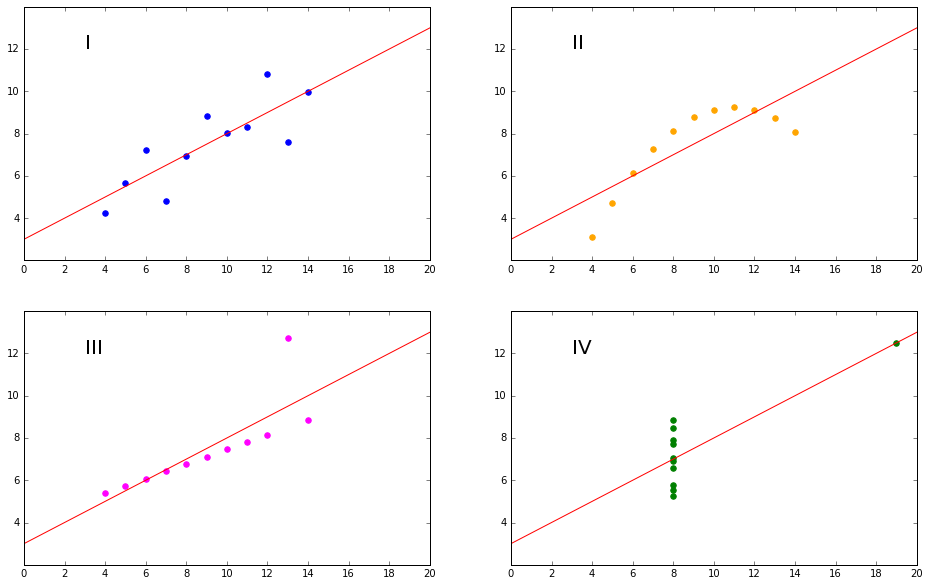

In [9]:
fig = plt.figure(figsize=(16,10))

plt.subplot(221)
plt.scatter(x1, y1, color='blue', s=30)
plt.plot(X_pair, Y_pair, 'r-')
plt.axis([2, 20, 2, 14])
plt.setp(plt.gca(), yticks=(4,6,8,10,12), xticks=(0,2,4,6,8,10,12,14,16,18,20))
plt.text(3, 12, 'I', fontsize=20)

plt.subplot(222)
plt.scatter(x2, y2, color='orange', s=30)
plt.plot(X_pair, Y_pair, 'r-')
plt.axis([2, 20, 2, 14])
plt.setp(plt.gca(), yticks=(4,6,8,10,12), xticks=(0,2,4,6,8,10,12,14,16,18,20))
plt.text(3, 12, 'II', fontsize=20)

plt.subplot(223)
plt.scatter(x3, y3, color='magenta', s=30)
plt.plot(X_pair, Y_pair, 'r-')
plt.axis([2, 20, 2, 14])
plt.text(3, 12, 'III', fontsize=20)
plt.setp(plt.gca(), yticks=(4,6,8,10,12), xticks=(0,2,4,6,8,10,12,14,16,18,20))

plt.subplot(224)
plt.scatter(x4, y4, color='green', s=30)
plt.plot(X_pair, Y_pair, 'r-')
plt.axis([2, 20, 2, 14])
plt.setp(plt.gca(), yticks=(4,6,8,10,12), xticks=(0,2,4,6,8,10,12,14,16,18,20))
plt.text(3, 12, 'IV', fontsize=20)

# Conclusion

Eureka!  You can now see the four datasets are quite different.  Things are not what they seem if you saw the numbers from a spreadsheet or a presentation.  If case I, II and III were stock  returns over time, which stock would you like to own?  When in doubt, visualize!  